<a href="https://colab.research.google.com/github/Douglch/HuggyFace-Deep-Reinforcement-Learning/blob/main/Unit3Bonus_icra22_optuna_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter tuning with Optuna

Github repo: https://github.com/araffin/tools-for-robotic-rl-icra2022

Optuna: https://github.com/optuna/optuna

Stable-Baselines3: https://github.com/DLR-RM/stable-baselines3

Documentation: https://stable-baselines3.readthedocs.io/en/master/

SB3 Contrib: https://github.com/Stable-Baselines-Team/stable-baselines3-contrib

RL Baselines3 zoo: https://github.com/DLR-RM/rl-baselines3-zoo

[RL Baselines3 Zoo](https://github.com/DLR-RM/rl-baselines3-zoo) is a collection of pre-trained Reinforcement Learning agents using Stable-Baselines3.

It also provides basic scripts for training, evaluating agents, tuning hyperparameters and recording videos.


## Introduction

In this notebook, you will learn the importance of tuning hyperparameters. You will first try to optimize the parameters manually and then we will see how to automate the search using Optuna.


## Install Dependencies and Stable Baselines3 Using Pip

List of full dependencies can be found in the [README](https://github.com/DLR-RM/stable-baselines3).


```
pip install stable-baselines3[extra]
```

In [ ]:
!pip install wheel==0.38.4
!pip install setuptools==65.5.0
!pip install stable-baselines3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached stable_baselines3-1.8.0-py3-none-any.whl (174 kB)
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616795 sha256=0511bc602c76d0654fa28dd3dc16ad7bb7e848850ae94c4d53d1cef1bf5789b5
  Stored in directory: /root/.cache/pip/wheels/81/aa/90/b67df76370d3916a2189b662cf48da38ce41a4e7e58b6abff5
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2


In [ ]:
# Optional: install SB3 contrib to have access to additional algorithms
!pip install sb3-contrib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Optuna will be used in the last part when doing hyperparameter tuning
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [ ]:
import gym
import numpy as np

The first thing you need to import is the RL model, check the documentation to know what you can use on which problem

In [ ]:
from stable_baselines3 import PPO, A2C, SAC, TD3, DQN

In [ ]:
# Algorithms from the contrib repo
# https://github.com/Stable-Baselines-Team/stable-baselines3-contrib
from sb3_contrib import QRDQN, TQC

In [ ]:
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

# Part I: The Importance Of Tuned Hyperparameters



When compared with Supervised Learning, Deep Reinforcement Learning is far more sensitive to the choice of hyper-parameters such as learning rate, number of neurons, number of layers, optimizer ... etc. 

Poor choice of hyper-parameters can lead to poor/unstable convergence. This challenge is compounded by the variability in performance across random seeds (used to initialize the network weights and the environment).

In addition to hyperparameters, selecting the appropriate algorithm is also an important choice. We will demonstrate it on the simple Pendulum task.

See [gym doc](https://gym.openai.com/envs/Pendulum-v0/): "The inverted pendulum swingup problem is a classic problem in the control literature. In this version  of the problem, the pendulum starts in a random position, and the goal is to swing it up so it stays upright."


Let's try first with PPO and a small budget of 4000 steps (20 episodes):

In [ ]:
env_id = "Pendulum-v1"
# Env used only for evaluation
eval_envs = make_vec_env(env_id, n_envs=10)
# 4000 training timesteps
budget_pendulum = 4000

### PPO

In [ ]:
ppo_model = PPO("MlpPolicy", env_id, seed=0, verbose=0).learn(budget_pendulum)

In [ ]:
mean_reward, std_reward = evaluate_policy(ppo_model, eval_envs, n_eval_episodes=100, deterministic=True)

print(f"PPO Mean episode reward: {mean_reward:.2f} +/- {std_reward:.2f}")

PPO Mean episode reward: -1200.67 +/- 300.66


### A2C

In [ ]:
# Define and train a A2C model


In [ ]:
# Evaluate the train A2C model
mean_reward, std_reward = ...

print(f"A2C Mean episode reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Both are far from solving the env (mean reward around -200).
Now, let's try with an off-policy algorithm:

### Training longer PPO ?

Maybe training longer would help?

You can try with 10x the budget, but in the case of A2C/PPO, training longer won't help much, finding better hyperparameters is needed instead.

In [ ]:
# train longer
new_budget = 10 * budget_pendulum

ppo_model = PPO("MlpPolicy", env_id, seed=0, verbose=0).learn(new_budget)

In [ ]:
mean_reward, std_reward = evaluate_policy(ppo_model, eval_envs, n_eval_episodes=100, deterministic=True)

print(f"PPO Mean episode reward: {mean_reward:.2f} +/- {std_reward:.2f}")

### PPO - Tuned Hyperparameters

Using Optuna, we can in fact tune the hyperparameters and find a working solution (from the [RL Zoo](https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/ppo.yml)):

In [ ]:
tuned_params = {
    "gamma": 0.9,
    "use_sde": True,
    "sde_sample_freq": 4,
    "learning_rate": 1e-3,
}
# ppo_model = PPO("MlpPolicy", env_id, seed=0, verbose=0).learn(budget_pendulum)
# budget = 10 * budget_pendulum
ppo_tuned_model = PPO("MlpPolicy", env_id, seed=1, verbose=1, **tuned_params).learn(50_000, log_interval=5)

Using cpu device
Creating environment from the given name 'Pendulum-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.22e+03   |
| time/                   |             |
|    fps                  | 624         |
|    iterations           | 5           |
|    time_elapsed         | 16          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.022206675 |
|    clip_fraction        | 0.236       |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.66       |
|    explained_variance   | 0.835       |
|    learning_rate        | 0.001       |
|    loss                 | 7.2         |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0183     |
|    std                  | 0.917       |
|    value_

In [ ]:
mean_reward, std_reward = evaluate_policy(ppo_tuned_model, eval_envs, n_eval_episodes=100, deterministic=True)

print(f"Tuned PPO Mean episode reward: {mean_reward:.2f} +/- {std_reward:.2f}")

Tuned PPO Mean episode reward: -200.17 +/- 117.24


Note: if you try SAC on the simple MountainCarContinuous environment, you will encounter some issues without tuned hyperparameters: https://github.com/rail-berkeley/softlearning/issues/76

Simple environments can be challenging even for SOTA algorithms.

# Part II: Grad Student Descent


### Challenge (10 minutes): "Grad Student Descent" 
The challenge is to find the best hyperparameters (max performance) for A2C on `CartPole-v1` with a limited budget of 20 000 training steps.


Maximum reward: 500 on `CartPole-v1`

The hyperparameters should work for different random seeds.

In [ ]:
budget = 20_000

#### The baseline: default hyperparameters

In [ ]:
eval_envs_cartpole = make_vec_env("CartPole-v1", n_envs=10)

In [ ]:
model = A2C("MlpPolicy", "CartPole-v1", seed=8, verbose=1).learn(budget)

Using cpu device
Creating environment from the given name 'CartPole-v1'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27.8     |
|    ep_rew_mean        | 27.8     |
| time/                 |          |
|    fps                | 454      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.601   |
|    explained_variance | 0.575    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.99     |
|    value_loss         | 7.26     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 27       |
|    ep_rew_mean        | 27       |
| time/                 |          |
|    fps                | 484      |


In [ ]:
mean_reward, std_reward = evaluate_policy(model, eval_envs_cartpole, n_eval_episodes=50, deterministic=True)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward:388.22 +/- 83.54


**Your goal is to beat that baseline and get closer to the optimal score of 500**

Time to tune!

In [ ]:
import torch.nn as nn

In [ ]:
policy_kwargs = dict(
    net_arch=[
      dict(vf=[64, 64], pi=[64, 64]), # network architectures for actor/critic
    ],
    activation_fn=nn.Tanh,
)

hyperparams = dict(
    n_steps=2 ** trial.suggest_int("n_steps", 3, 10), # number of steps to collect data before updating policy
    learning_rate=7e-4,
    gamma=0.99, # discount factor
    max_grad_norm=0.5, # The maximum value for the gradient clipping
    ent_coef=0.0, # Entropy coefficient for the loss calculation
)

model = A2C("MlpPolicy", "CartPole-v1", seed=8, verbose=1, **hyperparams).learn(budget)

In [ ]:
mean_reward, std_reward = evaluate_policy(model, eval_envs_cartpole, n_eval_episodes=50, deterministic=True)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

Hint - Recommended Hyperparameter Range

```python
gamma = trial.suggest_float("gamma", 0.9, 0.99999, log=True)
max_grad_norm = trial.suggest_float("max_grad_norm", 0.3, 5.0, log=True)
# from 2**3 = 8 to 2**10 = 1024
n_steps = 2 ** trial.suggest_int("exponent_n_steps", 3, 10)
learning_rate = trial.suggest_float("lr", 1e-5, 1, log=True)
ent_coef = trial.suggest_float("ent_coef", 0.00000001, 0.1, log=True)
# net_arch tiny: {"pi": [64], "vf": [64]}
# net_arch default: {"pi": [64, 64], "vf": [64, 64]}
# activation_fn = nn.Tanh / nn.ReLU
```

# Part III: Automatic Hyperparameter Tuning





In this part we will create a script that allows to search for the best hyperparameters automatically.

### Imports

In [ ]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_param_importances

### Config

In [ ]:
N_TRIALS = 100  # Maximum number of trials
N_JOBS = 1 # Number of jobs to run in parallel
N_STARTUP_TRIALS = 5  # Stop random sampling after N_STARTUP_TRIALS
N_EVALUATIONS = 2  # Number of evaluations during the training
N_TIMESTEPS = int(2e4)  # Training budget
EVAL_FREQ = int(N_TIMESTEPS / N_EVALUATIONS)
N_EVAL_ENVS = 5
N_EVAL_EPISODES = 10
TIMEOUT = int(60 * 15)  # 15 minutes

ENV_ID = "CartPole-v1"

DEFAULT_HYPERPARAMS = {
    "policy": "MlpPolicy",
    "env": ENV_ID,
}

### Exercise (5 minutes): Define the search space

In [ ]:
from typing import Any, Dict
import torch
import torch.nn as nn

def sample_a2c_params(trial: optuna.Trial) -> Dict[str, Any]:
    """
    Sampler for A2C hyperparameters.

    :param trial: Optuna trial object
    :return: The sampled hyperparameters for the given trial.
    """
    # Discount factor between 0.9 and 0.9999
    gamma = 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True)
    max_grad_norm = trial.suggest_float("max_grad_norm", 0.3, 5.0, log=True)
    # 8, 16, 32, ... 1024
    n_steps = 2 ** trial.suggest_int("exponent_n_steps", 3, 10)

    ### YOUR CODE HERE
    # TODO:
    # - define the learning rate search space [1e-5, 1] (log) -> `suggest_float`
    # - define the network architecture search space ["tiny", "small"] -> `suggest_categorical`
    # - define the activation function search space ["tanh", "relu"]
    learning_rate = trial.suggest_float("learning rate", 1e-5, 1, log=True)
    net_arch = trial.suggest_categorical("net_arch", ["tiny", "small"])
    activation_fn = trial.suggest_categorical("activation_fn", ["tanh", "relu"])

    ### END OF YOUR CODE

    # Display true values
    trial.set_user_attr("gamma_", gamma)
    trial.set_user_attr("n_steps", n_steps)

    net_arch = [
        {"pi": [64], "vf": [64]}
        if net_arch == "tiny"
        else {"pi": [64, 64], "vf": [64, 64]}
    ]

    activation_fn = {"tanh": nn.Tanh, "relu": nn.ReLU}[activation_fn]

    return {
        "n_steps": n_steps,
        "gamma": gamma,
        "learning_rate": learning_rate,
        "max_grad_norm": max_grad_norm,
        "policy_kwargs": {
            "net_arch": net_arch,
            "activation_fn": activation_fn,
        },
    }

### Define the objective function

First we define a custom callback to report the results of periodic evaluations to Optuna:

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback

class TrialEvalCallback(EvalCallback):
    """
    Callback used for evaluating and reporting a trial.
    
    :param eval_env: Evaluation environement
    :param trial: Optuna trial object
    :param n_eval_episodes: Number of evaluation episodes
    :param eval_freq:   Evaluate the agent every ``eval_freq`` call of the callback.
    :param deterministic: Whether the evaluation should
        use a stochastic or deterministic policy.
    :param verbose:
    """

    def __init__(
        self,
        eval_env: gym.Env,
        trial: optuna.Trial,
        n_eval_episodes: int = 5,
        eval_freq: int = 10000,
        deterministic: bool = True,
        verbose: int = 0,
    ):

        super().__init__(
            eval_env=eval_env,
            n_eval_episodes=n_eval_episodes,
            eval_freq=eval_freq,
            deterministic=deterministic,
            verbose=verbose,
        )
        self.trial = trial
        self.eval_idx = 0
        self.is_pruned = False

    def _on_step(self) -> bool:
        if self.eval_freq > 0 and self.n_calls % self.eval_freq == 0:
            # Evaluate policy (done in the parent class)
            super()._on_step()
            self.eval_idx += 1
            # Send report to Optuna
            self.trial.report(self.last_mean_reward, self.eval_idx)
            # Prune trial if need
            if self.trial.should_prune():
                self.is_pruned = True
                return False
        return True

### Exercise (10 minutes): Define the objective function

Then we define the objective function that is in charge of sampling hyperparameters, creating the model and then returning the result to Optuna

In [ ]:
def objective(trial: optuna.Trial) -> float:
    """
    Objective function using by Optuna to evaluate
    one configuration (i.e., one set of hyperparameters).

    Given a trial object, it will sample hyperparameters,
    evaluate it and report the result (mean episodic reward after training)

    :param trial: Optuna trial object
    :return: Mean episodic reward after training
    """

    kwargs = DEFAULT_HYPERPARAMS.copy()
    ### YOUR CODE HERE
    # TODO: 
    # 1. Sample hyperparameters and update the default keyword arguments: `kwargs.update(other_params)`
    # 2. Create the evaluation envs
    # 3. Create the `TrialEvalCallback`

    # 1. Sample hyperparameters and update the keyword arguments
    kwargs.update(sample_a2c_params(trial))
    # Create the RL model
    model = A2C(**kwargs)

    # 2. Create envs used for evaluation using `make_vec_env`, `ENV_ID` and `N_EVAL_ENVS`
    eval_envs = make_vec_env(ENV_ID, n_envs=N_EVAL_ENVS)

    # 3. Create the `TrialEvalCallback` callback defined above that will periodically evaluate
    # and report the performance using `N_EVAL_EPISODES` every `EVAL_FREQ`
    # TrialEvalCallback signature:
    # TrialEvalCallback(eval_env, trial, n_eval_episodes, eval_freq, deterministic, verbose)
    eval_callback = TrialEvalCallback(
        eval_env=eval_envs,
        trial=trial,
        n_eval_episodes=N_EVAL_EPISODES,
        eval_freq=EVAL_FREQ,
        deterministic=True,
        verbose=0,
    )

    ### END OF YOUR CODE

    nan_encountered = False
    try:
        # Train the model
        model.learn(N_TIMESTEPS, callback=eval_callback)
    except AssertionError as e:
        # Sometimes, random hyperparams can generate NaN
        print(e)
        nan_encountered = True
    finally:
        # Free memory
        model.env.close()
        eval_envs.close()

    # Tell the optimizer that the trial failed
    if nan_encountered:
        return float("nan")

    if eval_callback.is_pruned:
        raise optuna.exceptions.TrialPruned()

    return eval_callback.last_mean_reward

### The optimization loop

In [ ]:
import torch as th

# Set pytorch num threads to 1 for faster training
th.set_num_threads(1)
# Select the sampler, can be random, TPESampler, CMAES, ...
sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
# Do not prune before 1/3 of the max budget is used
pruner = MedianPruner(
    n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=N_EVALUATIONS // 3
)
# Create the study and start the hyperparameter optimization
study = optuna.create_study(sampler=sampler, pruner=pruner, direction="maximize")

try:
    study.optimize(objective, n_trials=N_TRIALS, n_jobs=N_JOBS, timeout=TIMEOUT)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print(f"    {key}: {value}")

# Write report
study.trials_dataframe().to_csv("study_results_a2c_cartpole.csv")

fig1 = plot_optimization_history(study)
fig2 = plot_param_importances(study)

fig1.show()
fig2.show()

[I 2023-05-23 07:59:33,588] A new study created in memory with name: no-name-9332e9c1-bab9-413e-b68c-d16df128040a
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/policies.py:457: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(
[I 2023-05-23 08:00:10,267] Trial 0 finished with value: 86.2 and parameters: {'gamma': 0.028760662672582496, 'max_grad_norm': 3.2953643802218906, 'exponent_n_steps': 3, 'learning rate': 3.7979371238872376e-05, 'net_arch': 'small', 'activation_fn': 'tanh'}. Best is trial 0 with value: 86.2.
[I 2023-05-23 08:00:40,969] Trial 1 finished with value: 9.9 and parameters: {'gamma': 0.005412877992418977, 'max_grad_norm': 2.1819461202188455, 'exponent_n_steps': 4, 'learning rate': 0.04024586463482085, 'net_arch': 'small', 'activation_fn': 'relu'}. Best is trial 0 with value: 

Number of finished trials:  57
Best trial:
  Value: 500.0
  Params: 
    gamma: 0.08863924390449174
    max_grad_norm: 0.7310832735295064
    exponent_n_steps: 10
    learning rate: 0.0018410892515688846
    net_arch: small
    activation_fn: tanh
  User attrs:
    gamma_: 0.9113607560955083
    n_steps: 1024


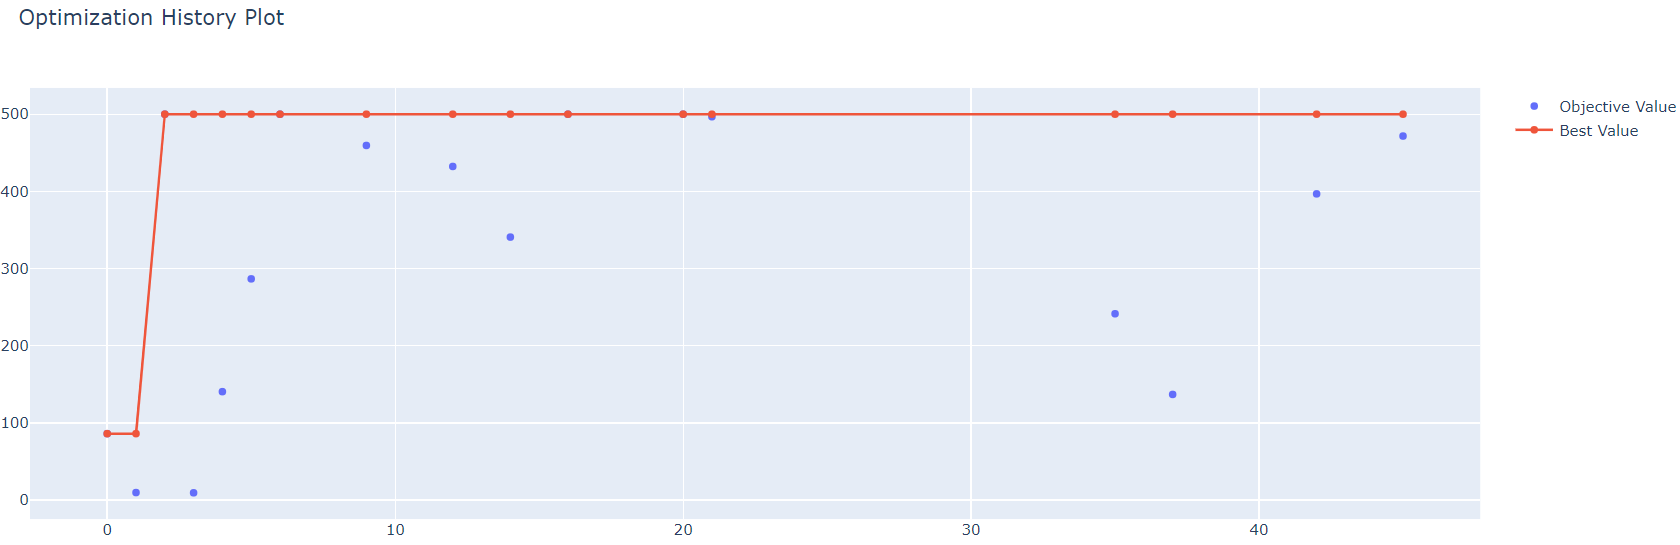

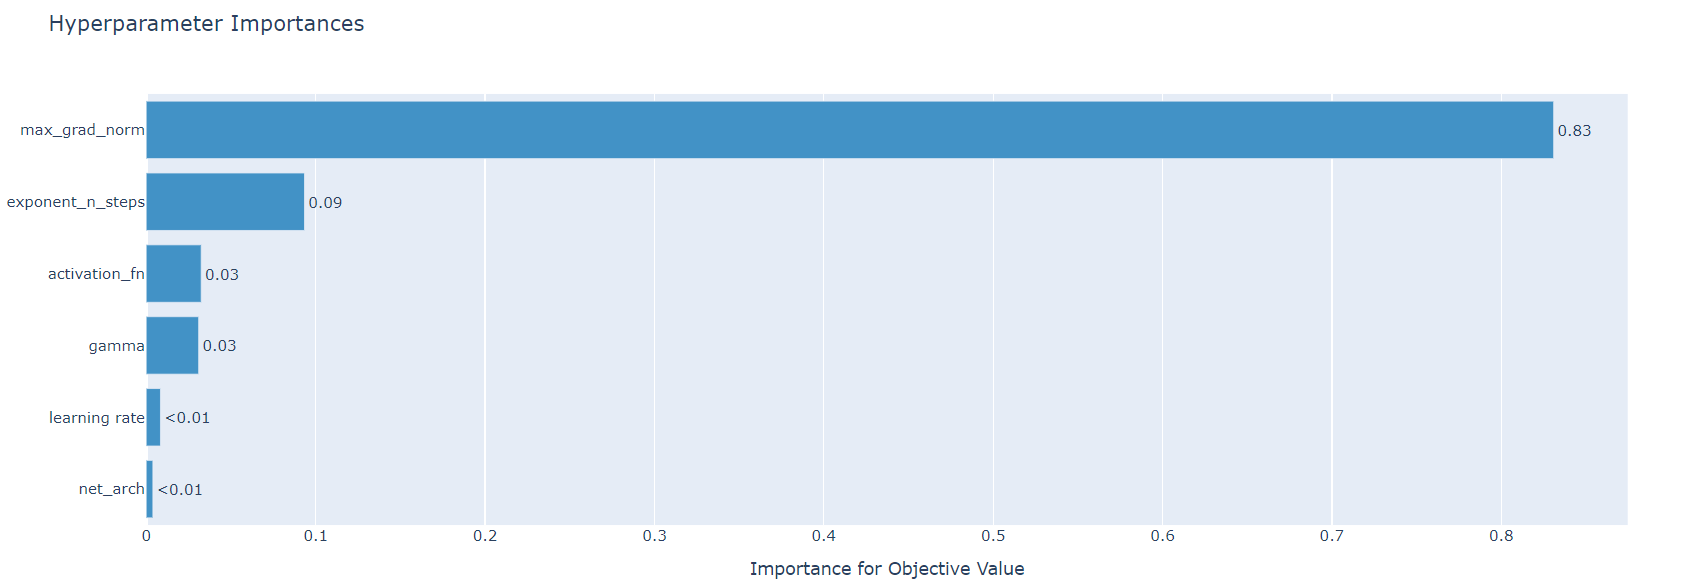

Complete example: https://github.com/DLR-RM/rl-baselines3-zoo

# Conclusion

What we have seen in this notebook:
- the importance of good hyperparameters
- how to do automatic hyperparameter search with optuna
